In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

In [2]:
data = pd.read_csv("/home/madhav/Desktop/MADHAV/finaldata.csv")

In [3]:
## Making the column name in upper case
data.columns=map(str.upper,data.columns)
data.columns

Index(['STATE', 'ACCOUNT LENGTH', 'AREA CODE', 'PHONE NUMBER',
       'INTERNATIONAL PLAN', 'VOICE MAIL PLAN', 'NUMBER VMAIL MESSAGES',
       'TOTAL DAY MINUTES', 'TOTAL DAY CALLS', 'TOTAL DAY CHARGE',
       'TOTAL EVE MINUTES', 'TOTAL EVE CALLS', 'TOTAL EVE CHARGE',
       'TOTAL NIGHT MINUTES', 'TOTAL NIGHT CALLS', 'TOTAL NIGHT CHARGE',
       'TOTAL INTL MINUTES', 'TOTAL INTL CALLS', 'TOTAL INTL CHARGE',
       'CUSTOMER SERVICE CALLS', 'CHURN'],
      dtype='object')

In [4]:
# Making Dummy Variables for boolean variables 

data['INTERNATIONAL PLAN'] = np.where(data['INTERNATIONAL PLAN']=='Yes', 1,0)
data['VOICE MAIL PLAN'] = np.where(data['VOICE MAIL PLAN']=='Yes', 1,0)
data['CHURN'] = np.where(data['CHURN']==True, 1,0)

In [5]:
# Making dummy variable for categorical variables

data = pd.get_dummies(data,columns=['AREA CODE','CUSTOMER SERVICE CALLS'])

In [6]:
## Subset variables
final_data=data[['ACCOUNT LENGTH','NUMBER VMAIL MESSAGES','TOTAL DAY MINUTES', 'TOTAL DAY CALLS',
        'TOTAL EVE MINUTES', 'TOTAL EVE CALLS',
        'TOTAL NIGHT MINUTES', 'TOTAL NIGHT CALLS',
        'TOTAL INTL MINUTES', 'TOTAL INTL CALLS']]

In [7]:

from sklearn import preprocessing
clustervar = final_data.copy()
clustervar['ACCOUNT LENGTH']=preprocessing.scale(clustervar['ACCOUNT LENGTH'].astype('float64'))
clustervar['NUMBER VMAIL MESSAGES']=preprocessing.scale(clustervar['NUMBER VMAIL MESSAGES'].astype('float64'))
clustervar['TOTAL DAY MINUTES']=preprocessing.scale(clustervar['TOTAL DAY MINUTES'].astype('float64'))
clustervar['TOTAL DAY CALLS']=preprocessing.scale(clustervar['TOTAL DAY CALLS'].astype('float64'))
#clustervar['TOTAL DAY CHARGE']=preprocessing.scale(clustervar['TOTAL DAY CHARGE'].astype('float64'))
clustervar['TOTAL EVE MINUTES']=preprocessing.scale(clustervar['TOTAL EVE MINUTES'].astype('float64'))
clustervar['TOTAL EVE CALLS']=preprocessing.scale(clustervar['TOTAL EVE CALLS'].astype('float64'))
#clustervar['TOTAL EVE CHARGE']=preprocessing.scale(clustervar['TOTAL EVE CHARGE'].astype('float64'))
clustervar['TOTAL NIGHT MINUTES']=preprocessing.scale(clustervar['TOTAL NIGHT MINUTES'].astype('float64'))
clustervar['TOTAL NIGHT CALLS']=preprocessing.scale(clustervar['TOTAL NIGHT CALLS'].astype('float64'))
#clustervar['TOTAL NIGHT CHARGE']=preprocessing.scale(clustervar['TOTAL NIGHT CHARGE'].astype('float64'))
clustervar['TOTAL INTL MINUTES']=preprocessing.scale(clustervar['TOTAL INTL MINUTES'].astype('float64'))
clustervar['TOTAL INTL CALLS']=preprocessing.scale(clustervar['TOTAL INTL CALLS'].astype('float64'))
#clustervar['TOTAL INTL CHARGE']=preprocessing.scale(clustervar['TOTAL INTL CHARGE'].astype('float64'))

In [8]:
strdata = pd.DataFrame(clustervar)

In [9]:
#Concatenatinating the dataset 
final_data = pd.concat([strdata,data['INTERNATIONAL PLAN'],data['VOICE MAIL PLAN'],
       data['CHURN'], data['AREA CODE_408'], data['AREA CODE_415'],
       data['AREA CODE_510'], data['CUSTOMER SERVICE CALLS_1'], data['CUSTOMER SERVICE CALLS_2'],
       data['CUSTOMER SERVICE CALLS_3']], axis=1)

In [10]:
final_data.head(5)

,ACCOUNT LENGTH,NUMBER VMAIL MESSAGES,TOTAL DAY MINUTES,TOTAL DAY CALLS,TOTAL EVE MINUTES,TOTAL EVE CALLS,TOTAL NIGHT MINUTES,TOTAL NIGHT CALLS,TOTAL INTL MINUTES,TOTAL INTL CALLS,INTERNATIONAL PLAN,VOICE MAIL PLAN,CHURN,AREA CODE_408,AREA CODE_415,AREA CODE_510,CUSTOMER SERVICE CALLS_1,CUSTOMER SERVICE CALLS_2,CUSTOMER SERVICE CALLS_3
0,0.696851,1.227234,1.637000,0.487788,-0.067723,-0.058698,0.921441,-0.495382,-0.123535,-0.624820,0,0,0,0,1,0,1,0,0
1,0.165355,1.300169,-0.343142,1.162035,-0.106838,0.151244,1.122003,0.138630,1.339016,-0.624820,0,0,0,0,1,0,1,0,0
2,-0.644543,-0.596150,-0.245570,0.643384,-1.078541,1.148469,-0.273665,1.089648,-0.084007,-0.624820,0,0,0,0,1,0,0,0,1
3,1.709224,-0.596150,-0.970665,-0.238324,-1.972013,-1.528293,-1.220652,1.459488,0.350806,-1.028216,0,0,0,1,0,0,1,0,0
4,-0.138357,-0.596150,-0.438801,-0.653245,0.965740,-1.318351,-0.162011,0.772642,0.785618,0.181970,0,0,0,0,0,1,0,0,1


In [11]:
X = final_data.drop('CHURN',axis=1)
y = final_data['CHURN']

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [13]:
# The gradient descent algorithm (which is used in neural network training and other machine learning algorithms)
#also converges faster with normalized features.

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [14]:
# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
y_pred = classifier.predict(X_test) 

In [16]:
#Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[580   2]
 [ 71   4]]
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       582
          1       0.67      0.05      0.10        75

avg / total       0.87      0.89      0.84       657



In [17]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test , y_pred ))
print('Recall:', recall_score(y_test,  y_pred))
print('Precision:', precision_score(y_test,  y_pred))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test,  y_pred))

Accuracy: 0.8888888888888888
F1 score: 0.09876543209876544
Recall: 0.05333333333333334
Precision: 0.6666666666666666

 clasification report:
              precision    recall  f1-score   support

          0       0.89      1.00      0.94       582
          1       0.67      0.05      0.10        75

avg / total       0.87      0.89      0.84       657


 confussion matrix:
 [[580   2]
 [ 71   4]]


In [18]:
#Comparing Error Rate with the K Value
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

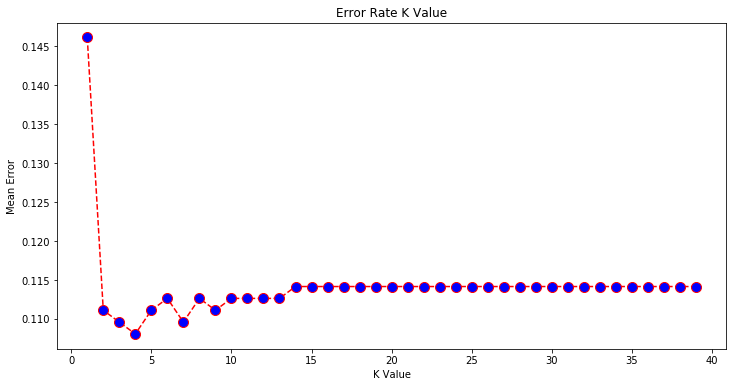

In [19]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [20]:
#From the output we can see that the mean error is zero when the value of the K is 7. So, it would be advise you to play around with the value of K to see how it impacts the accuracy of the predictions.